In [30]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.precision', 5)
pd.set_option('display.float_format', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📦 Libraries imported successfully")

📦 Libraries imported successfully


In [31]:
# Import project modules
import sys
import os

# Fix Python path priority issue - insert at beginning to override conflicting paths
project_src_path = '/Users/dasein/dev/cex_arbitrage/src'
if project_src_path in sys.path:
    sys.path.remove(project_src_path)
sys.path.insert(0, project_src_path)

# Import Plotly after fixing path
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

from exchanges.structs import Symbol, AssetName
from trading.research.trading_utlis import load_market_data
symbol = Symbol(base=AssetName("F"), quote=AssetName("USDT"))
date_to = datetime.utcnow()

# date_to = datetime.fromisoformat("2025-10-18 05:50:00").replace(tzinfo=timezone.utc)
date_from = date_to - timedelta(hours=1)

print(f"📊 Loading data for {symbol.base}/{symbol.quote}")
print(f"📅 Period: {date_from} to {date_to}")
print(f"⏱️  Duration: {(date_to - date_from).total_seconds() / 3600:.1f} hours")

df = await load_market_data(symbol=symbol, start_date=date_from, end_date=date_to)

📊 Loading data for F/USDT
📅 Period: 2025-10-18 15:29:45.654352 to 2025-10-18 16:29:45.654352
⏱️  Duration: 1.0 hours
📅 Symbol: F/USDT - Fetching market data from database - from 2025-10-18 15:29 to 2025-10-18 16:29
  🗄️  Loading from database...
  💾 Cached as: MEXC_SPOT_F_USDT_20251018_1525_20251018_1625.pkl
  🗄️  Loading from database...
  💾 Cached as: GATEIO_FUTURES_F_USDT_20251018_1525_20251018_1625.pkl
  🗄️  Loading from database...
  💾 Cached as: GATEIO_SPOT_F_USDT_20251018_1525_20251018_1625.pkl


📊 Plotting last 5 minutes of data
📅 From: 2025-10-18 10:54:37+00:00 to 2025-10-18 10:59:37+00:00
📈 Records: 308

📊 Data availability in last 5 minutes:
  mexc_spot_bid_price: 308/308 (100.0%)
  gateio_futures_bid_price: 60/308 (19.5%)
  gateio_spot_bid_price: 149/308 (48.4%)


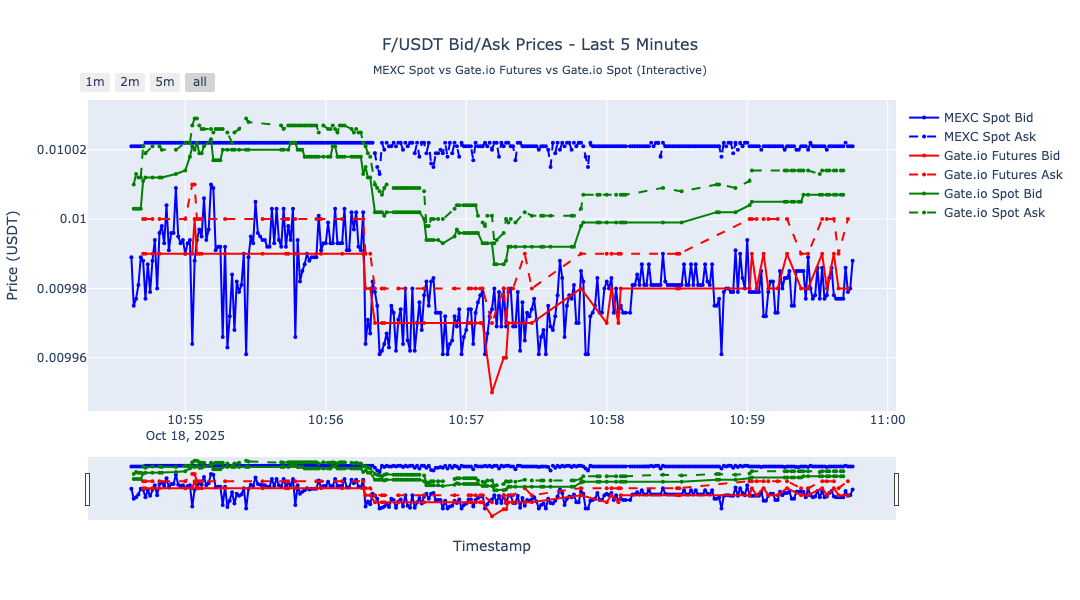

In [32]:
# Get the latest 5 minutes of data
latest_time = df.dropna().index.max()
five_min_ago = latest_time - timedelta(minutes=5)
recent_df = df[df.index >= five_min_ago].copy()

print(f"📊 Plotting last 5 minutes of data")
print(f"📅 From: {five_min_ago} to {latest_time}")
print(f"📈 Records: {len(recent_df)}")

# Create interactive Plotly figure for prices
fig = go.Figure()

# Blue: MEXC Spot (solid bid, dashed ask)
fig.add_trace(go.Scatter(
    x=recent_df.index, 
    y=recent_df['mexc_spot_bid_price'],
    mode='lines+markers',
    name='MEXC Spot Bid',
    line=dict(color='blue', width=2),
    marker=dict(size=4, color='blue'),
    connectgaps=True,
    hovertemplate='<b>MEXC Spot Bid</b><br>Time: %{x}<br>Price: $%{y:.6f}<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=recent_df.index, 
    y=recent_df['mexc_spot_ask_price'],
    mode='lines+markers',
    name='MEXC Spot Ask',
    line=dict(color='blue', width=2, dash='dash'),
    marker=dict(size=4, color='blue'),
    connectgaps=True,
    hovertemplate='<b>MEXC Spot Ask</b><br>Time: %{x}<br>Price: $%{y:.6f}<extra></extra>'
))

# Red: Gate.io Futures (solid bid, dashed ask)
fig.add_trace(go.Scatter(
    x=recent_df.index, 
    y=recent_df['gateio_futures_bid_price'],
    mode='lines+markers',
    name='Gate.io Futures Bid',
    line=dict(color='red', width=2),
    marker=dict(size=4, color='red'),
    connectgaps=True,
    hovertemplate='<b>Gate.io Futures Bid</b><br>Time: %{x}<br>Price: $%{y:.6f}<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=recent_df.index, 
    y=recent_df['gateio_futures_ask_price'],
    mode='lines+markers',
    name='Gate.io Futures Ask',
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(size=4, color='red'),
    connectgaps=True,
    hovertemplate='<b>Gate.io Futures Ask</b><br>Time: %{x}<br>Price: $%{y:.6f}<extra></extra>'
))

# Green: Gate.io Spot (solid bid, dashed ask)
fig.add_trace(go.Scatter(
    x=recent_df.index, 
    y=recent_df['gateio_spot_bid_price'],
    mode='lines+markers',
    name='Gate.io Spot Bid',
    line=dict(color='green', width=2),
    marker=dict(size=4, color='green'),
    connectgaps=True,
    hovertemplate='<b>Gate.io Spot Bid</b><br>Time: %{x}<br>Price: $%{y:.6f}<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=recent_df.index, 
    y=recent_df['gateio_spot_ask_price'],
    mode='lines+markers',
    name='Gate.io Spot Ask',
    line=dict(color='green', width=2, dash='dash'),
    marker=dict(size=4, color='green'),
    connectgaps=True,
    hovertemplate='<b>Gate.io Spot Ask</b><br>Time: %{x}<br>Price: $%{y:.6f}<extra></extra>'
))

# Update layout
fig.update_layout(
    title={
        'text': 'F/USDT Bid/Ask Prices - Last 5 Minutes<br><sub>MEXC Spot vs Gate.io Futures vs Gate.io Spot (Interactive)</sub>',
        'x': 0.5,
        'font': {'size': 16}
    },
    xaxis_title='Timestamp',
    yaxis_title='Price (USDT)',
    width=1200,
    height=600,
    hovermode='x unified',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.01
    )
)

# Add range selector for time navigation
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="minute", stepmode="backward"),
                dict(count=2, label="2m", step="minute", stepmode="backward"),
                dict(count=5, label="5m", step="minute", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Add data availability info
non_null_counts = recent_df.count()
print(f"\n📊 Data availability in last 5 minutes:")
for col in ['mexc_spot_bid_price', 'gateio_futures_bid_price', 'gateio_spot_bid_price']:
    if col in non_null_counts:
        print(f"  {col}: {non_null_counts[col]}/{len(recent_df)} ({100*non_null_counts[col]/len(recent_df):.1f}%)")

fig.show()

💰 Arbitrage Opportunities Statistics:
  MEXC Spot → Gate.io Futures: 0.4111% avg, 0.6986% max, 0.2195% min
  Gate.io Spot → Gate.io Futures: 0.1431% avg, 0.2496% max, 0.0200% min
  Total Arbitrage Sum: 0.5586% avg, 0.9288% max, 0.3193% min

🎯 Interactive Features:
  • Hover over dots to see exact values
  • Lines connect data points with small markers
  • Use time range selector buttons (1m, 2m, 5m, All)
  • Zoom in/out with mouse wheel or selection
  • Pan by clicking and dragging
  • Toggle lines on/off by clicking legend entries
  • Use range slider at bottom for quick navigation
  • connectgaps=True ensures continuous lines even with missing data


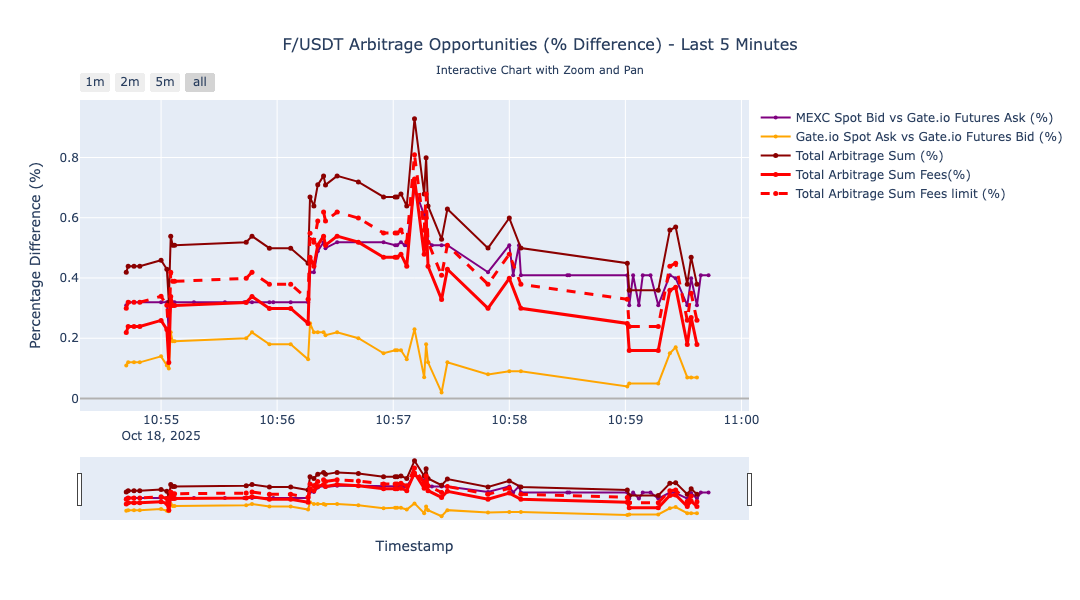

In [44]:
# Create interactive arbitrage opportunities chart
# Calculate percentage differences for arbitrage opportunities
recent_df['mexc_vs_gateio_futures_arb'] = (
    (recent_df['mexc_spot_ask_price'] - recent_df['gateio_futures_bid_price']) / 
    recent_df['mexc_spot_ask_price'] * 100
)

recent_df['gateio_spot_vs_futures_arb'] = (
    (recent_df['gateio_spot_bid_price'] - recent_df['gateio_futures_ask_price']) / 
    recent_df['gateio_spot_bid_price'] * 100
)

recent_df['mexc_vs_gateio_futures_arb_limit'] = (
    (recent_df['mexc_spot_bid_price'] - recent_df['gateio_futures_bid_price']) / 
    recent_df['mexc_spot_bid_price'] * 100
)

recent_df['gateio_spot_vs_futures_arb_limit'] = (
    (recent_df['gateio_spot_ask_price'] - recent_df['gateio_futures_bid_price']) / 
    recent_df['gateio_spot_ask_price'] * 100
)

FEES = 0.1 + 0.05 + 0.05
# Calculate sum of both arbitrage opportunities
recent_df['total_arbitrage_sum'] = (
    recent_df['mexc_vs_gateio_futures_arb'] + recent_df['gateio_spot_vs_futures_arb']
)

recent_df['total_arbitrage_sum_fees'] = (
    recent_df['total_arbitrage_sum'] - FEES
)

recent_df['total_arbitrage_sum_fees_limit'] = (
    recent_df['total_arbitrage_sum'] - (0.1+0+0.02)
)

# Create interactive Plotly figure for arbitrage
fig_arb = go.Figure()

# Purple: MEXC vs Gate.io Futures arbitrage
fig_arb.add_trace(go.Scatter(
    x=recent_df.index, 
    y=recent_df['mexc_vs_gateio_futures_arb'],
    mode='lines+markers',
    name='MEXC Spot Bid vs Gate.io Futures Ask (%)',
    line=dict(color='purple', width=2),
    marker=dict(size=4, color='purple'),
    connectgaps=True,
    hovertemplate='<b>MEXC → Gate.io Futures</b><br>Time: %{x}<br>Arbitrage: %{y:.4f}%<extra></extra>'
))

# Orange: Gate.io Spot vs Futures arbitrage  
fig_arb.add_trace(go.Scatter(
    x=recent_df.index, 
    y=recent_df['gateio_spot_vs_futures_arb'],
    mode='lines+markers',
    name='Gate.io Spot Ask vs Gate.io Futures Bid (%)',
    line=dict(color='orange', width=2),
    marker=dict(size=4, color='orange'),
    connectgaps=True,
    hovertemplate='<b>Gate.io Spot → Futures</b><br>Time: %{x}<br>Arbitrage: %{y:.4f}%<extra></extra>'
))

# Dark red: Total arbitrage sum
fig_arb.add_trace(go.Scatter(
    x=recent_df.index, 
    y=recent_df['total_arbitrage_sum'],
    mode='lines+markers',
    name='Total Arbitrage Sum (%)',
    line=dict(color='darkred', width=2),
    marker=dict(size=5, color='darkred'),
    connectgaps=True,
    hovertemplate='<b>Total Arbitrage Sum</b><br>Time: %{x}<br>Total: %{y:.4f}%<extra></extra>'
))

fig_arb.add_trace(go.Scatter(
    x=recent_df.index, 
    y=recent_df['total_arbitrage_sum_fees'],
    mode='lines+markers',
    name='Total Arbitrage Sum Fees(%)',
    line=dict(color='red', width=3),
    marker=dict(size=5, color='red'),
    connectgaps=True,
    hovertemplate='<b>Total with fees</b><br>Time: %{x}<br>Total: %{y:.4f}%<extra></extra>'
))

fig_arb.add_trace(go.Scatter(
    x=recent_df.index, 
    y=recent_df['total_arbitrage_sum_fees_limit'],
    mode='lines+markers',
    name='Total Arbitrage Sum Fees limit (%)',
    line=dict(color='red', width=3, dash='dash'),
    marker=dict(size=5, color='red'),
    connectgaps=True,
    hovertemplate='<b>Total with fees</b><br>Time: %{x}<br>Total: %{y:.4f}%<extra></extra>'
))

# Add horizontal line at 0%
fig_arb.add_hline(y=0, line_dash="solid", line_color="black", opacity=0.3)

# Update layout for arbitrage chart
fig_arb.update_layout(
    title={
        'text': 'F/USDT Arbitrage Opportunities (% Difference) - Last 5 Minutes<br><sub>Interactive Chart with Zoom and Pan</sub>',
        'x': 0.5,
        'font': {'size': 16}
    },
    xaxis_title='Timestamp',
    yaxis_title='Percentage Difference (%)',
    width=1200,
    height=600,
    hovermode='x unified',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.01
    )
)

# Add range selector for time navigation
fig_arb.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="minute", stepmode="backward"),
                dict(count=2, label="2m", step="minute", stepmode="backward"),
                dict(count=5, label="5m", step="minute", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Print arbitrage opportunity statistics
print(f"💰 Arbitrage Opportunities Statistics:")
mexc_arb = recent_df['mexc_vs_gateio_futures_arb'].dropna()
gateio_arb = recent_df['gateio_spot_vs_futures_arb'].dropna()
total_arb = recent_df['total_arbitrage_sum'].dropna()

if len(mexc_arb) > 0:
    print(f"  MEXC Spot → Gate.io Futures: {mexc_arb.mean():.4f}% avg, {mexc_arb.max():.4f}% max, {mexc_arb.min():.4f}% min")
if len(gateio_arb) > 0:
    print(f"  Gate.io Spot → Gate.io Futures: {gateio_arb.mean():.4f}% avg, {gateio_arb.max():.4f}% max, {gateio_arb.min():.4f}% min")
if len(total_arb) > 0:
    print(f"  Total Arbitrage Sum: {total_arb.mean():.4f}% avg, {total_arb.max():.4f}% max, {total_arb.min():.4f}% min")

print(f"\n🎯 Interactive Features:")
print(f"  • Hover over dots to see exact values")
print(f"  • Lines connect data points with small markers")
print(f"  • Use time range selector buttons (1m, 2m, 5m, All)")
print(f"  • Zoom in/out with mouse wheel or selection")
print(f"  • Pan by clicking and dragging")
print(f"  • Toggle lines on/off by clicking legend entries")
print(f"  • Use range slider at bottom for quick navigation")
print(f"  • connectgaps=True ensures continuous lines even with missing data")

fig_arb.show()